## Analysis of the effects of the 2017 Travel Ban Executive order
We were curious what some of the effects of the 2017 Travel Ban executive order signed by President Donald Trump on individuals and wanted to answer a few specific questions.
    
    1. Looking at the 7 countries targeted by the ban, how many people would be refused greencards over a 90 day period? What proportion would be refugees?
    -howandwheregreencard.xls
    Assume refugee applicants for 2017 are roughly the same as 2015 and the applicants are distributed iid Uniformly over the year.
    
    4. With Refugees, where do they come from? What country brings the highest proportion of refugees vs Green Card holders? Do these countries have more refugees than others on average?
    -HowAndWhereGreenCard.xls
    Plot on map with concentric circles showing number of immigrants and proportion of immigrants that are refugees.
    
    2. How many of these individuals would be deported? How many for doing illegal things?
    -RemovedByCrimAndNationality.xls
    
    5. How does GDP impact refugee rates?
    -World Bank GDP Dataset
    -HowAndWhereGreenCard.xls
    A linear regression with GDP, institutional quality, etc...
    
    3.Analysis public sentiment for the ban.
    Twitter API for public sentiment.
We asked these to see more into what this ban would do to the United States as a whole using data from 2015 from the US Department of Homeland Security. This data will be analyzed through pandas and visualized in different ways.

In [227]:
import pandas as pd
import numpy as np
import Austin
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms

In [205]:
greencard = pd.read_excel('HowAndWhereGreenCard.xls',sheetname='Country',
              skiprows=[0,1,2], skip_footer=4,na_values = ['D'])
greencard['refugee_to_total']=''
greencard['banned']=''
greencard['Total'] = greencard['Total'].astype(np.float64)
bannedcount = ['Iran','Iraq','Libya','Somalia', 'Sudan','Syria','Yemen']
for x in xrange(len(greencard)):
    if greencard['Country of birth'][x] in bannedcount:
        greencard['banned'][x] = True
    else:
        greencard['banned'][x] = False
for x in xrange(len(greencard)): 
    greencard['refugee_to_total'][x]=greencard['Refugees and asylees'][x]/greencard['Total'][x]
greencard['refugee_to_total']=greencard['refugee_to_total'].astype(np.float)

G:\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
greencard = greencard[1:]
greencard

,Country of birth,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total,banned
1,Afghanistan,8328.0,272.0,16.0,1011.0,50.0,691.0,6288.0,0.082973,False
2,Albania,4653.0,614.0,81.0,2017.0,1770.0,152.0,19.0,0.032667,False
3,Algeria,1775.0,103.0,40.0,570.0,1035.0,19.0,8.0,0.010704,False
4,Angola,154.0,8.0,12.0,89.0,6.0,39.0,0.0,0.253247,False
5,Anguilla,22.0,NaN,NaN,18.0,0.0,0.0,1.0,0.000000,False
6,Antigua-Barbuda,290.0,97.0,12.0,176.0,NaN,0.0,NaN,0.000000,False
7,Argentina,3730.0,194.0,1095.0,2194.0,48.0,133.0,66.0,0.035657,False
8,Armenia,2962.0,247.0,120.0,1035.0,1324.0,225.0,11.0,0.075962,False
9,Aruba,38.0,4.0,4.0,30.0,0.0,0.0,0.0,0.000000,False
10,Australia,3034.0,68.0,930.0,1636.0,390.0,NaN,NaN,NaN,False


In [215]:
removal = pd.read_excel('RemovedByCrimAndNationality.xls',sheetname='Country',
              skiprows=[0,1,2], skip_footer=7,na_values = ['D','X'])


In [216]:
remove2015 = removal.loc[:,['Country of nationality', '2015','Unnamed: 29','Unnamed: 30']]
remove2015

,Country of nationality,2015,Unnamed: 29,Unnamed: 30
0,NaN,Total,Criminal 1,Non-Criminal
1,Total,333341,139950,193391
2,Afghanistan,9,NaN,NaN
3,Albania,40,21,19
4,Algeria,14,NaN,NaN
5,Angola,10,3,7
6,Antigua-Barbuda,16,11,5
7,Argentina,132,58,74
8,Armenia,16,NaN,NaN
9,Australia,32,16,16


In [217]:
new_header = remove2015.iloc[0] 
new_header =list(new_header)
new_header = ['Country of nationality'] +list(new_header)
del new_header[1]
remove2015.columns = new_header
remove2015 = remove2015[2:]
remove2015['proportion_crim'] = ''
remove2015['banned']=''
remove2015.reset_index(inplace=True)
del remove2015['index']
for x in xrange(len(remove2015)):
    if remove2015['Country of nationality'][x] in bannedcount:
        remove2015['banned'][x] = True
    else:
        remove2015['banned'][x] = False
for x in xrange(len(remove2015)):
    if float(remove2015['Total'][x])!=0:
        remove2015['proportion_crim'][x]=float(remove2015[u'Criminal 1'][x])/float(remove2015['Total'][x])

remove2015

G:\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country of nationality,Total,Criminal 1,Non-Criminal,proportion_crim,banned
0,Afghanistan,9,NaN,NaN,NaN,False
1,Albania,40,21,19,0.525,False
2,Algeria,14,NaN,NaN,NaN,False
3,Angola,10,3,7,0.3,False
4,Antigua-Barbuda,16,11,5,0.6875,False
5,Argentina,132,58,74,0.439394,False
6,Armenia,16,NaN,NaN,NaN,False
7,Australia,32,16,16,0.5,False
8,Austria,7,3,4,0.428571,False
9,Bahamas,73,66,7,0.90411,False


In [218]:
Austin.save_game(greencard,"greencard")

You have succesfully saved!


In [219]:
Austin.save_game(remove2015,'Removed')

You have succesfully saved!


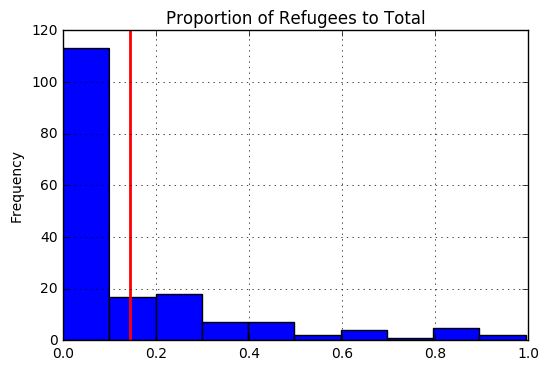

In [220]:
greencard['refugee_to_total'].plot.hist(bins = 10,title = 'Proportion of Refugees to Total',grid = True)
plt.axvline(greencard['refugee_to_total'].mean(),color ='r',linewidth = 2)
plt.show()

In [221]:
greencard.groupby(by= 'banned').mean()
#many have 0 which skews the data, look at medians

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,5174.435233,1240.881657,824.901163,2408.587302,266.872727,708.295858,166.444444,0.131144
True,7480.714286,582.285714,374.200000,1384.285714,544.285714,4557.428571,195.200000,0.472585


In [222]:
greencard.groupby(by= 'banned').median()
#also hard to do since there are only 7 countries

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,875.0,103.0,87.5,511.0,41.0,47.0,7.0,0.041479
True,3840.0,209.0,68.0,986.0,136.0,1975.0,5.0,0.404632


In [223]:
greencard.groupby(by= 'banned').std()
#very high std dev

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,15144.772610,4485.837863,2980.651141,8147.619015,570.710577,3901.032560,1077.365276,0.203852
True,7190.767801,788.579676,627.434220,1058.903476,874.819165,6654.417552,424.214215,0.308354


In [226]:
trues = greencard[greencard['banned']==True]
falses = greencard[greencard['banned']==False]

ttest_ind(trues['refugee_to_total'], falses['refugee_to_total'],nan_policy='omit')
#reject null that they are equal and state that they are significantly different, however large difference in n means there is a
#high type II error rate, this is probably very wrong


Ttest_indResult(statistic=4.2491215437520609, pvalue=3.4914764184732473e-05)

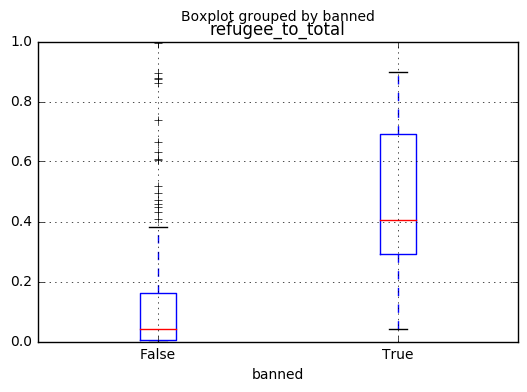

In [234]:
greencard.boxplot('refugee_to_total',by='banned')
plt.show()

In [132]:
greencard['refugee_to_total'].to_frame()
greencard['refugee_to_total']

0        0.144615
1       0.0829731
2       0.0326671
3       0.0107042
4        0.253247
5               0
6               0
7       0.0356568
8       0.0759622
9               0
10              0
11      0.0105485
12      0.0724852
13      0.0193103
14              0
15      0.0123066
16              0
17      0.0997994
18              0
19     0.00647668
20      0.0407725
21              0
22       0.994466
23      0.0264453
24      0.0745052
25       0.295082
26      0.0101541
27              0
28              0
29      0.0167411
          ...    
171             0
172             0
173      0.011257
174        0.0125
175      0.296094
176             0
177      0.102521
178       0.26408
179      0.458411
180      0.101487
181             0
182    0.00124533
183     0.0868726
184     0.0338015
185      0.154867
186             0
187      0.319111
188     0.0589708
189      0.199497
190    0.00246188
191     0.0513514
192     0.0435993
193     0.0769424
194     0.0881452
195    0.0